In [43]:
# all my libraries
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, accuracy_score, roc_curve, auc, confusion_matrix
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import LabelEncoder


In [8]:
# Load the dataset
df_aggregated = pd.read_csv('cluster_labels_k6.csv')  
df_aggregated.head()

,key,Customer Age,Quantity,Revenue,Cost,Unit Price,Unit Cost,Profit Margin,Cluster,Customer Gender,Country,State
0,17.0_F_France_Essonne,17.0,6.0,779.0,801.0,129.833333,133.500,0.090187,0,F,France,Essonne
1,17.0_F_France_Hauts de Seine,17.0,7.0,1355.0,1181.0,312.458333,272.875,0.152743,0,F,France,Hauts de Seine
2,17.0_F_France_Loiret,17.0,3.0,43.0,44.0,14.333333,14.670,-0.023256,0,F,France,Loiret
3,17.0_F_France_Nord,17.0,6.0,1284.0,1380.0,283.777778,300.000,-0.121049,0,F,France,Nord
4,17.0_F_France_Seine (Paris),17.0,10.0,1037.0,907.0,91.466667,82.266,0.045366,0,F,France,Seine (Paris)


In [59]:
df_aggregated_encoded = pd.get_dummies(df_aggregated, columns=['Cluster', 'Customer Gender', 'Country', 'State', 'Customer Age'], drop_first=True)
df_aggregated_encoded.head()

#This is makes the dataset easier to work with, it makes bool values into 0 and 1
for col in df_aggregated_encoded.select_dtypes(include=['bool']).columns:
    df_aggregated_encoded[col] = df_aggregated_encoded[col].astype(int)

df_aggregated_encoded.head(5)

,key,Quantity,Revenue,Cost,Unit Price,Unit Cost,Profit Margin,Cluster_1,Cluster_2,Cluster_3,...,Customer Age_77.0,Customer Age_78.0,Customer Age_79.0,Customer Age_80.0,Customer Age_81.0,Customer Age_82.0,Customer Age_84.0,Customer Age_85.0,Customer Age_86.0,Customer Age_87.0
0,0,6.0,779.0,801.0,129.833333,133.500,0.090187,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,7.0,1355.0,1181.0,312.458333,272.875,0.152743,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3.0,43.0,44.0,14.333333,14.670,-0.023256,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,6.0,1284.0,1380.0,283.777778,300.000,-0.121049,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,10.0,1037.0,907.0,91.466667,82.266,0.045366,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X_clusters = df_aggregated_encoded[['Cluster_1', 'Cluster_2', 'Cluster_3','Cluster_4','Cluster_5']]

				
y_clust = df_aggregated['Cluster']


X_train, X_test, y_clust_train, y_clust_test = train_test_split(X_clusters, y_clust, test_size=0.2, random_state=42)


model = LogisticRegression()
model.fit(X_train, y_clust_train)


y_clust_pred = model.predict(X_test)
#print r^2 score
r2 = r2_score(y_clust_test, y_clust_pred)
print(f"R^2 Score: {r2:.4f}")
# Print accuracy score
accuracy = accuracy_score(y_clust_test, y_clust_pred)
print(f"Accuracy: {accuracy:.4f}")
print("the reason it would be 100% accuracy is because the clusters are already defined, so the model is just learning to predict the cluster labels based on the features.")

R^2 Score: 1.0000
Accuracy: 1.0000
the reason it would be 100% accuracy is because the clusters are already defined, so the model is just learning to predict the cluster labels based on the features.


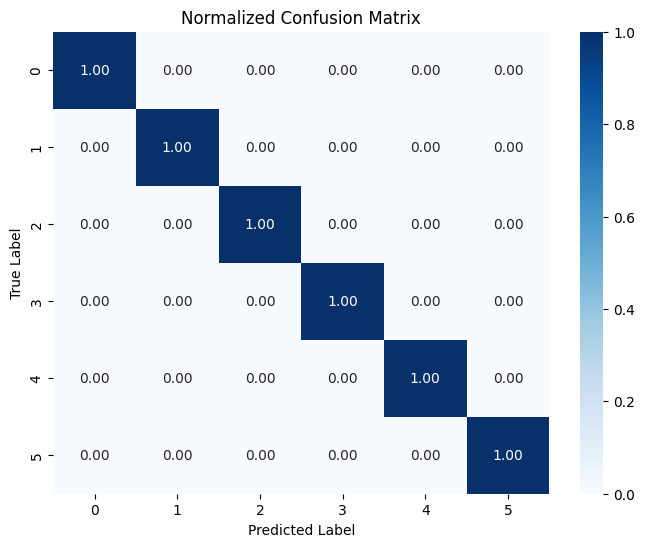

In [ ]:
# # Generate the normalized confusion matrix
cm = confusion_matrix(y_clust_test, y_clust_pred, normalize='true')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', 
            xticklabels=np.unique(y_clust_test), 
            yticklabels=np.unique(y_clust_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix')
plt.show()


In [12]:
coef_df = pd.DataFrame({
    'Feature': X_clusters.columns,
    'Coefficient': model.coef_[0]
})
display(coef_df)

,Feature,Coefficient
0,Cluster_1,-2.976144
1,Cluster_2,-3.397888
2,Cluster_3,-3.194773
3,Cluster_4,-2.999422
4,Cluster_5,-3.405985


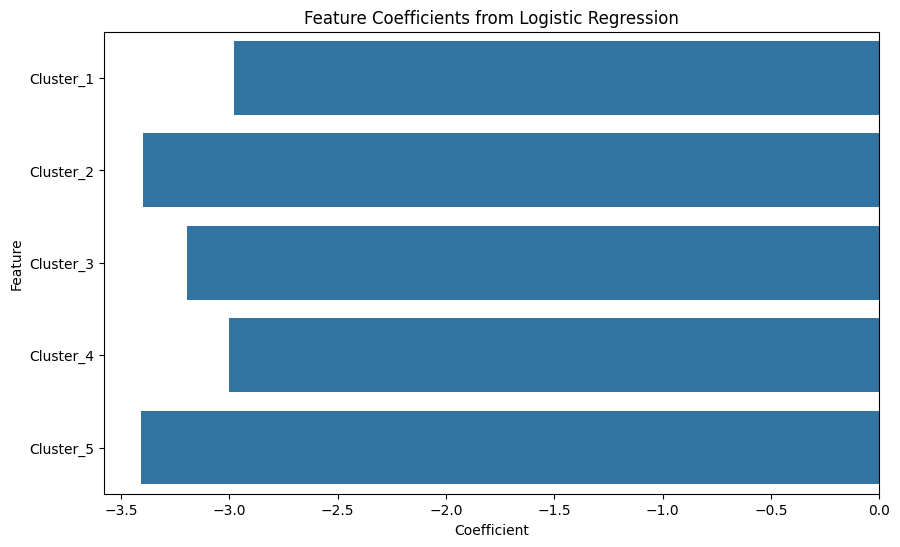

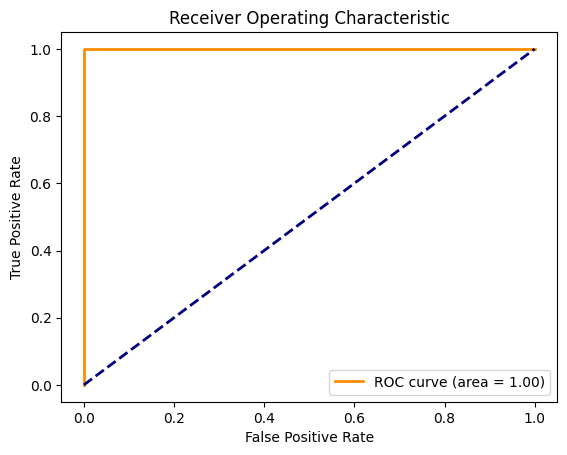

In [13]:
#display a barplot of the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Feature Coefficients from Logistic Regression')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

# Plot ROC curve
# Binarize y_clust_test and y_clust_pred for ROC curve calculation
y_clust_test_binary = (y_clust_test > y_clust_test.median()).astype(int)
y_clust_pred_binary = (y_clust_pred > y_clust_test.median()).astype(int)

fpr, tpr, thresholds = roc_curve(y_clust_test_binary, y_clust_pred_binary)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [14]:
df_aggregated_encoded.columns

Index(['key', 'Customer Age', 'Quantity', 'Revenue', 'Cost', 'Unit Price',
       'Unit Cost', 'Profit Margin', 'Cluster_1', 'Cluster_2', 'Cluster_3',
       'Cluster_4', 'Cluster_5', 'Customer Gender_M', 'Country_Germany',
       'Country_United Kingdom', 'Country_United States', 'State_Arizona',
       'State_Bayern', 'State_Brandenburg', 'State_California',
       'State_Charente-Maritime', 'State_England', 'State_Essonne',
       'State_Florida', 'State_Garonne (Haute)', 'State_Georgia',
       'State_Hamburg', 'State_Hauts de Seine', 'State_Hessen',
       'State_Illinois', 'State_Kentucky', 'State_Loir et Cher',
       'State_Loiret', 'State_Massachusetts', 'State_Minnesota',
       'State_Mississippi', 'State_Missouri', 'State_Montana', 'State_Moselle',
       'State_New York', 'State_Nord', 'State_Nordrhein-Westfalen',
       'State_North Carolina', 'State_Ohio', 'State_Oregon',
       'State_Pas de Calais', 'State_Saarland', 'State_Seine (Paris)',
       'State_Seine Saint Den

R^2 Score for Model 1: -0.1839
Accuracy for Model 1: 57.9755


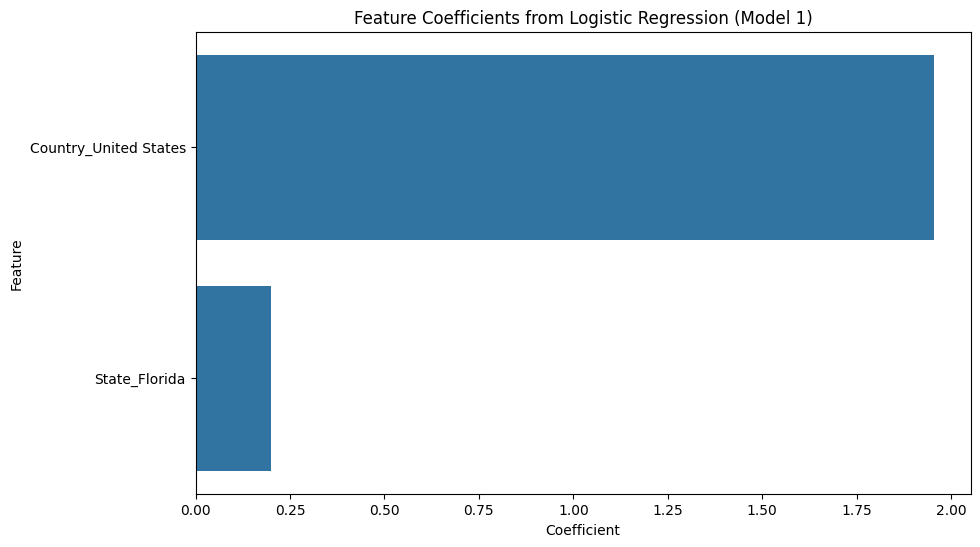

In [ ]:
#Model option 1: where the features are 'USA', 'state_florida'
X1 = df_aggregated_encoded[['Country_United States', 'State_Florida']]
y1 = df_aggregated_encoded[['Cluster_1', 'Cluster_2', 'Cluster_3']]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
model1 = LogisticRegression(solver='lbfgs')
# For multi-label classification, use the 'multi_output' option for LogisticRegression
multioutput_model1 = MultiOutputClassifier(LogisticRegression(solver='lbfgs'))
multioutput_model1.fit(X1_train, y1_train)
y1_pred = multioutput_model1.predict(X1_test)
r2_1 = r2_score(y1_test, y1_pred)
accuracy_1 = accuracy_score(y1_test, y1_pred)
print(f"R^2 Score for Model 1: {r2_1:.4f}")

# Calculate accuracy
accuracy_1 = (accuracy_score(y1_test, y1_pred)) * 100
print(f"Accuracy for Model 1: {accuracy_1:.4f}")
#get coefficients
coef_df1 = pd.DataFrame({
    'Feature': X1.columns,
    'Coefficient': multioutput_model1.estimators_[0].coef_[0]
})
coef_df1['Coefficient'] = coef_df1['Coefficient'].abs()
coef_df1 = coef_df1.sort_values(by='Coefficient', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df1)
plt.title('Feature Coefficients from Logistic Regression (Model 1)')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()


,Feature,Coefficient
0,Country_United States,1.953671
1,State_Florida,0.199672


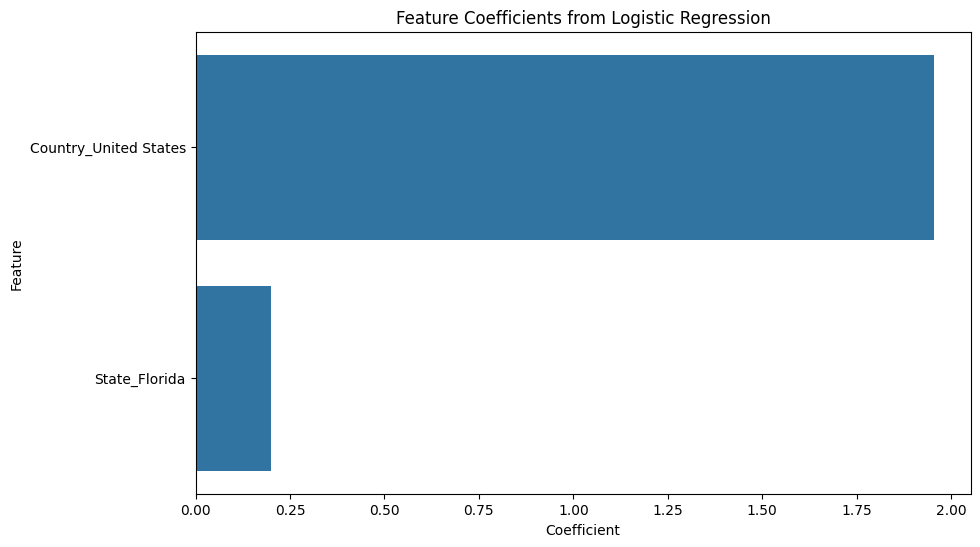

In [41]:
from sklearn.metrics import roc_curve, auc

#display feature importance
display(coef_df1)
#display a barplot of the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df1)
plt.title('Feature Coefficients from Logistic Regression')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()


In [48]:
# Encode the 'key' column
label_encoder = LabelEncoder()
df_aggregated['key'] = label_encoder.fit_transform(df_aggregated['key'])

# Add the encoded 'key' column to the feature set
X_with_key = pd.concat([df_aggregated[['key']], X1], axis=1)
y = df_aggregated_encoded[['Cluster_1', 'Cluster_2', 'Cluster_3', 'Cluster_4', 'Cluster_5']]

# Split the data
X_train_with_key, X_test_with_key, y_train, y_test = train_test_split(X_with_key, y, test_size=0.2, random_state=42)

# Train the model

# y1_pred = multioutput_model1.predict(X1_test)
model_with_key = MultiOutputClassifier(LogisticRegression(solver='lbfgs'))
model_with_key.fit(X_train_with_key, y_train)

# Evaluate the model
y_pred_with_key = model_with_key.predict(X_test_with_key)
r2_with_key = r2_score(y_test, y_pred_with_key)
# accuracy_with_key = accuracy_score((y_test > y_test.median()).astype(int), (y_pred_with_key > y_test.median()).astype(int))
accuracy_with_key = accuracy_score(y_test, y_pred_with_key)
print(f"R^2 Score with 'key': {r2_with_key:.4f}")
print(f"Accuracy with 'key': {accuracy_with_key:.4f}")

R^2 Score with 'key': -0.1411
Accuracy with 'key': 0.3344


,Feature,Coefficient
0,key,0.000816
1,Country_United States,1.451640
2,State_Florida,0.273520


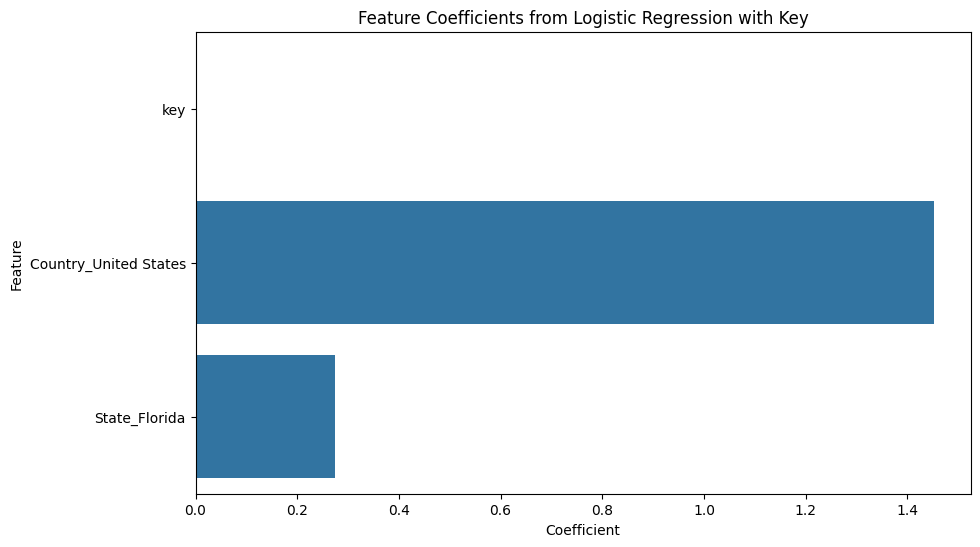

In [76]:
#display feature importance
coef_df2 = pd.DataFrame({
    'Feature': X_with_key.columns,
    'Coefficient': model_with_key
})
# Extract coefficients from each estimator in the MultiOutputClassifier
coefs = [est.coef_[0] for est in model_with_key.estimators_]
# Take the mean absolute value of coefficients across all outputs for each feature
coef_mean = np.mean(np.abs(coefs), axis=0)
coef_df2['Coefficient'] = coef_mean
display(coef_df2)

#display a barplot of the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df2)
plt.title('Feature Coefficients from Logistic Regression with Key')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

In [66]:
#model to compare with
# print(df_aggregated_encoded.columns)
mer1 = df_aggregated['Customer Age']
X_comp = pd.concat([df_aggregated_encoded['Country_United States'], mer1], axis=1)

y_comp = df_aggregated_encoded[['Cluster_1', 'Cluster_2', 'Cluster_3', 'Cluster_4']]

X_comp_train, X_comp_test, y_comp_train, y_comp_test = train_test_split(X_comp, y_comp, test_size=0.2, random_state=42)
model_comp = MultiOutputClassifier(LogisticRegression(solver='lbfgs'))
model_comp.fit(X_comp_train, y_comp_train)
y_comp_pred = model_comp.predict(X_comp_test)
r2_comp = r2_score(y_comp_test, y_comp_pred)
accuracy_comp = accuracy_score(y_comp_test, y_comp_pred)
print(f"R^2 Score for Comparison Model: {r2_comp:.4f}")
print(f"Accuracy for Comparison Model: {accuracy_comp * 100} %")

R^2 Score for Comparison Model: -0.0646
Accuracy for Comparison Model: 61.963190184049076 %


,Feature,Coefficient
0,Country_United States,1.568286
1,Customer Age,0.032829


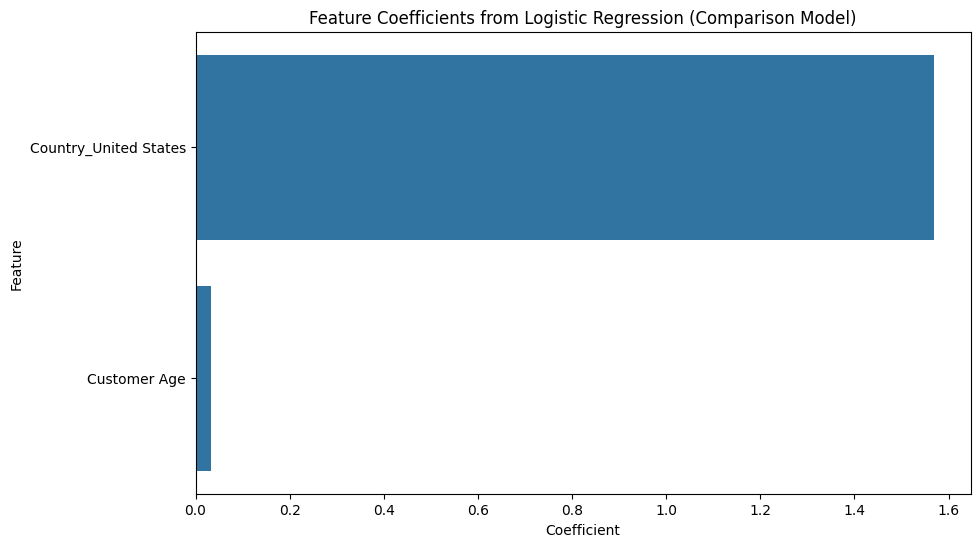

In [74]:
#display feature importance
coef_df_comp = pd.DataFrame({
    'Feature': X_comp.columns,
    'Coefficient': model_comp
})
# Extract coefficients from each estimator in the MultiOutputClassifier
coefs = [est.coef_[0] for est in model_comp.estimators_]
# Take the mean absolute value of coefficients across all outputs for each feature
coef_mean = np.mean(np.abs(coefs), axis=0)
coef_df_comp['Coefficient'] = coef_mean
display(coef_df_comp)
#display a barplot of the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df_comp)
plt.title('Feature Coefficients from Logistic Regression (Comparison Model)')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()